<a href="https://colab.research.google.com/github/chloemaybrandon/UCLA_CS_M146/blob/main/CS146_Winter2025_Problem_Set_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This code was adapted from course material by Jenna Wiens (UMichigan).

import sys

In [ ]:
# To add your own Drive Run this cell.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Please specify the full paths to the regression_train.csv
# and regression_test.csv files in your gdrive directory
### ========== TODO : START ========== ###
# train_path = '/content/drive/My Drive/UCLA/Winter_2025/CM146_ML/pset2/regression_train.csv'
# test_path = '/content/drive/My Drive/UCLA/Winter_2025/CM146_ML/pset2/regression_test.csv'
sys.path += ['/content/drive/My Drive/UCLA/Winter_2025/CM146_ML/pset2']
# train_path = str(sys.path + ['regression_train.csv'])
# test_path = str(sys.path + ['regression_test.csv'])
### ========== TODO : END ========== ###

In [ ]:
# Use only the provided packages!
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class PolynomialRegression() :

    def __init__(self, m=1) :
        """
        Ordinary least squares regression.

        Attributes
        --------------------
            coef_   -- numpy array of shape (d,)
                       estimated coefficients for the linear regression problem
            m_      -- integer
                       order for polynomial regression
        """
        self.coef_ = None
        self.m_ = m


    def generate_polynomial_features(self, X) :
        """
        Maps X to an mth degree feature vector e.g. [1, X, X^2, ..., X^m].

        Parameters
        --------------------
            X       -- numpy array of shape (n,1), features

        Returns
        --------------------
            Phi     -- numpy array of shape (n,(m+1)), mapped features
        """

        n,d = X.shape

        ### ========== TODO : START ========== ###
        # part b: modify to create matrix for simple linear model
        # part g: modify to create matrix for polynomial model
        # Phi = X
        # m = self.m_

        m = self.m_
        if d == m + 1:
            Phi = X
        else:
            new_col = np.ones((n, 1))
            Phi = np.concatenate((new_col, X), axis=1)
            for i in range(2, m + 1):
                new_col = np.power(X, i)
                Phi = np.concatenate((Phi, new_col), axis=1)

        ### ========== TODO : END ========== ###

        return Phi


    def fit_GD(self, X, y, eta=None,
                eps=0, tmax=10000, verbose=False) :
        """
        Finds the coefficients of a {d-1}^th degree polynomial
        that fits the data using least squares batch gradient descent.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
            eta     -- float, step size
            eps     -- float, convergence criterion
            tmax    -- integer, maximum number of iterations
            verbose -- boolean, for debugging purposes

        Returns
        --------------------
            self    -- an instance of self
        """

        if verbose :
            plt.subplot(1, 2, 2)
            plt.xlabel('iteration')
            plt.ylabel(r'$J(\theta)$')
            plt.ion()
            plt.show()

        X = self.generate_polynomial_features(X) # map features
        n,d = X.shape
        eta_input = eta
        self.coef_ = np.zeros(d)                 # coefficients
        err_list  = np.zeros((tmax,1))           # errors per iteration

        # GD loop
        for t in range(tmax) :
          if eta_input is None :
            eta = 1 / (t + 1)
          else :
            eta = eta_input

          error = np.subtract(np.dot(X, self.coef_), y)
          self.coef_ = self.coef_ - (2 * eta * np.dot(X.T, error))

          y_pred = np.dot(X, self.coef_)
          err_list[t] = np.sum((y - y_pred) ** 2) / float(n)

          # stop?
          if t > 0 and abs(err_list[t] - err_list[t-1]) <= eps:
            break

          # debugging
          if verbose :
              x = np.reshape(X[:,1], (n,1))
              cost = self.cost(x,y)
              plt.subplot(1, 2, 1)
              plt.cla()
              plot_data(x, y)
              self.plot_regression()
              plt.subplot(1, 2, 2)
              plt.plot([t+1], [cost], 'bo')
              plt.suptitle('iteration: %d, cost: %f' % (t+1, cost))
              plt.draw()
              plt.pause(0.05) # pause for 0.05 sec

        print(f'Number of iterations for stepsize: {t+1}, Learning rate: {eta:.6f}, Coefficients: {self.coef_}')
        return self


        # # GD loop
        # for t in range(tmax):
        #     ### ========== TODO : START ========== ###
        #     # part f: update step size
        #     # change the default eta in the function signature to 'eta=None'
        #     # and update the line below to your learning rate function
        #     if eta_input is None :
        #         eta = None # change this line
        #     else :
        #         eta = eta_input
        #     ### ========== TODO : END ========== ###

        #     ### ========== TODO : START ========== ###
        #     # part d: update theta (self.coef_) using one step of GD
        #     # hint: you can write simultaneously update all theta using vector math

        #     # track error
        #     # hint: you cannot use self.predict(...) to make the predictions
        #     # y_pred = y # change this line
        #     # err_list[t] = np.sum(np.power(y - y_pred, 2)) / float(n)

        #     # self.coef_ = self.coef_ - eta * (np.dot((np.dot(X.T, X)), self.coef_) - np.dot(X.T, y))
        #     # # track error
        #     # # hint: you cannot use self.predict(...) to make the predictions
        #     # y_pred = np.dot(self.coef_, X.T)
        #     # err_list[t] = np.sum(np.power(y - y_pred, 2)) / float(n)




            ### ========== TODO : END ========== ###




    def fit(self, X, y) :
        """
        Finds the coefficients of a {d-1}^th degree polynomial
        that fits the data using the closed form solution.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets

        Returns
        --------------------
            self    -- an instance of self
        """

        X = self.generate_polynomial_features(X) # map features

        ### ========== TODO : START ========== ###
        # part e: implement closed-form solution
        # hint: use np.dot(...) and np.linalg.pinv(...)
        #       be sure to update self.coef_ with your solution

        start_time = time.time()
        w = np.dot(np.dot(np.linalg.pinv(np.dot(X.transpose(), X)), X.transpose()), y)
        self.coef_ = w
        end_time = time.time()
        duration = end_time - start_time

        return self, duration


        ### ========== TODO : END ========== ###


    def predict(self, X) :
        """
        Predict output for X.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features

        Returns
        --------------------
            y       -- numpy array of shape (n,), predictions
        """
        if self.coef_ is None :
            raise Exception("Model not initialized. Perform a fit first.")

        X = self.generate_polynomial_features(X) # map features

        ### ========== TODO : START ========== ###
        # part c: predict y


        # Note: * does not equal .dot()
        y = (self.coef_).dot(X.T)

        # y = np.matmul(X, w)
        ### ========== TODO : END ========== ###

        return y


    def cost(self, X, y) :
        """
        Calculates the objective function.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets

        Returns
        --------------------
            cost    -- float, objective J(theta)
        """

        X = self.generate_polynomial_features(X)
        cost = sum([(np.dot(X, self.coef_) - y) ** 2])
        return cost

        ### ========== TODO : START ========== ###
        # part d: compute J(theta)
        # cost = sum([(self.predict(X=X) - y) ** 2])
        #cost = np.sum(np.square(y - self.predict(X)))
        ### ========== TODO : END ========== ###
        return cost




    # def rms_error(self, X, y) :
    #     train_path = '/content/drive/My Drive/UCLA/Winter_2025/CM146_ML/pset2/regression_train.csv'
    #     test_path = '/content/drive/My Drive/UCLA/Winter_2025/CM146_ML/pset2/regression_test.csv'
    #     train_data = load_data(train_path)
    #     test_data = load_data(test_path)

    #     """
    #     Calculates the root mean square error.

    #     Parameters
    #     --------------------
    #         X       -- numpy array of shape (n,d), features
    #         y       -- numpy array of shape (n,), targets

    #     Returns
    #     --------------------
    #         error   -- float, RMSE
    #     """
    #     ### ========== TODO : START ========== ###
    #     # part h: compute RMSE
    #     training_errors = []
    #     test_errors = []
    #     for m in range(11):
    #       model = PolynomialRegression(m=m)
    #       model.fit(train_data.X, train_data.y)
    #       train_error = model.rms_error(train_data.X, train_data.y)
    #       test_error = model.rms_error(test_data.X, test_data.y)
    #       training_errors.append(train_error)
    #       test_errors.append(test_error)
    #       plot_erms(range(11), training_errors, test_errors)
    #     ### ========== TODO : END ========== ###
    #     return error

    def rms_error(self, X, y) :
      # part h: compute RMSE
      X = self.generate_polynomial_features(X)
      error = np.subtract(np.dot(X, self.coef_), y)
      error = np.sqrt(np.sum(np.square(error)))
      return error

    def plot_regression(self, xmin=0, xmax=1, n=50, **kwargs) :
        """Plot regression line."""
        if 'color' not in kwargs :
            kwargs['color'] = 'r'
        if 'linestyle' not in kwargs :
            kwargs['linestyle'] = '-'

        X = np.reshape(np.linspace(0,1,n), (n,1))
        y = self.predict(X)
        plot_data(X, y, **kwargs)
        plt.show()


In [ ]:
######################################################################
# classes
######################################################################

class Data :

    def __init__(self, X=None, y=None) :
        """
        Data class.

        Attributes
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        """

        # n = number of examples, d = dimensionality
        self.X = X
        self.y = y

    def load(self, filename) :
        """
        Load csv file into X array of features and y array of labels.

        Parameters
        --------------------
            filename -- string, filename
        """

        # load data
        with open(filename, 'r') as fid :
            data = np.loadtxt(fid, delimiter=",")

        # separate features and labels
        self.X = data[:,:-1]
        self.y = data[:,-1]

    def plot(self, **kwargs) :
        """Plot data."""

        if 'color' not in kwargs :
            kwargs['color'] = 'b'

        fig = plt.figure(figsize=(10, 5))
        plt.scatter(self.X, self.y, **kwargs)
        plt.xlabel('x', fontsize = 16)
        plt.ylabel('y', fontsize = 16)
        plt.show()

In [ ]:
# wrapper functions around Data class
def load_data(filename) :
    data = Data()
    data.load(filename)
    return data

def plot_data(X, y, **kwargs) :
    data = Data(X, y)
    data.plot(**kwargs)

In [ ]:
def plot_erms(mrange, train_errs, test_errs):
    fig = plt.figure(figsize=(10, 5))
    plt.plot(mrange, train_errs, 'o-', color='red', label='Training')
    plt.plot(mrange, test_errs, 'o-', color='blue', label='Test')
    plt.xlabel(r'$m$', fontsize = 16)
    plt.ylabel(r'$E_{RMS}$', fontsize = 16)
    plt.title('Polynomial regression error')
    plt.legend()
    plt.show()

Visualizing data...
Train Data:


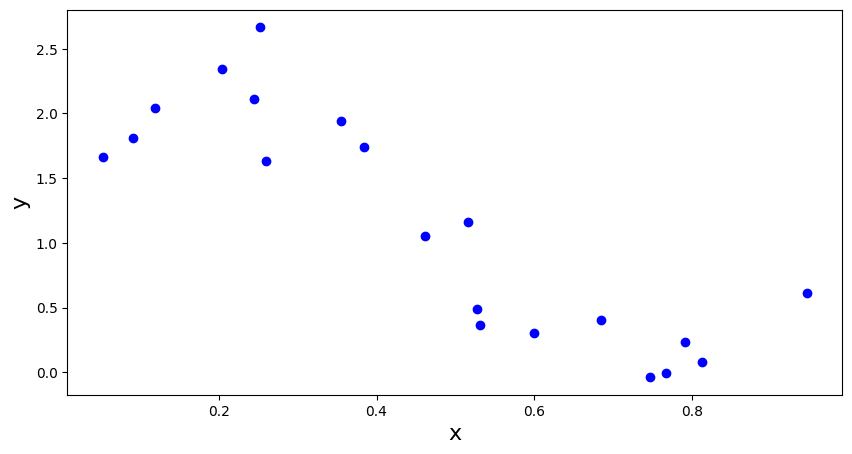

Test Data:


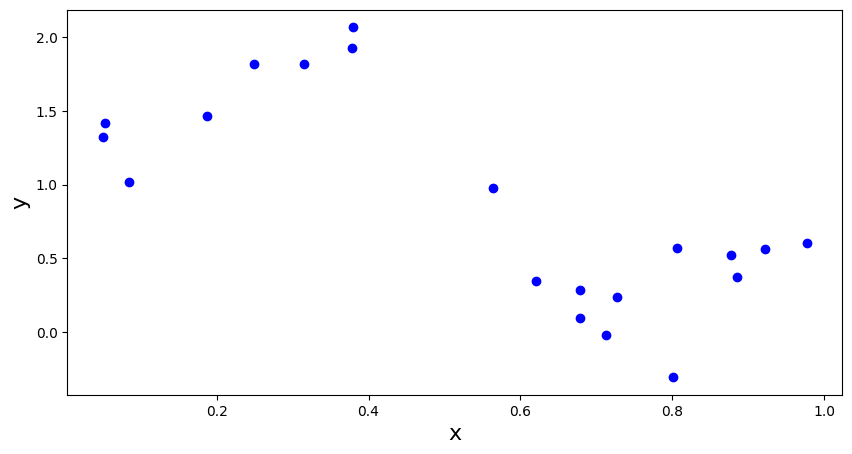

Investigating linear regression...
40.233847409671
FITTING WITH GD
Number of iterations for stepsize: 10000, Learning rate: 0.000001, Coefficients: [0.36400847 0.09215787]
Number of iterations for stepsize: 10000, Learning rate: 0.000010, Coefficients: [ 1.15699657 -0.22522908]
Number of iterations for stepsize: 7020, Learning rate: 0.001000, Coefficients: [ 2.4464068 -2.816353 ]
Number of iterations for stepsize: 10000, Learning rate: 0.100000, Coefficients: [nan nan]
eta: 1e-06 | coefficient: [0.36400847 0.09215787] | cost: 25.86329625891011 | num_iterations: 0 | time: 0.13246560096740723
eta: 1e-05 | coefficient: [ 1.15699657 -0.22522908] | cost: 13.158898555756045 | num_iterations: 0 | time: 0.15175366401672363
eta: 0.001 | coefficient: [ 2.4464068 -2.816353 ] | cost: 3.9125764057919463 | num_iterations: 0 | time: 0.08884143829345703
eta: 0.1 | coefficient: [nan nan] | cost: nan | num_iterations: 0 | time: 0.17255949974060059


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-304-affc21f0a9b5>:98: RuntimeWarning: overflow encountered in square
  err_list[t] = np.sum((y - y_pred) ** 2) / float(n)
<ipython-input-304-affc21f0a9b5>:101: RuntimeWarning: invalid value encountered in subtract
  if t > 0 and abs(err_list[t] - err_list[t-1]) <= eps:
<ipython-input-304-affc21f0a9b5>:95: RuntimeWarning: invalid value encountered in subtract
  self.coef_ = self.coef_ - (2 * eta * np.dot(X.T, error))


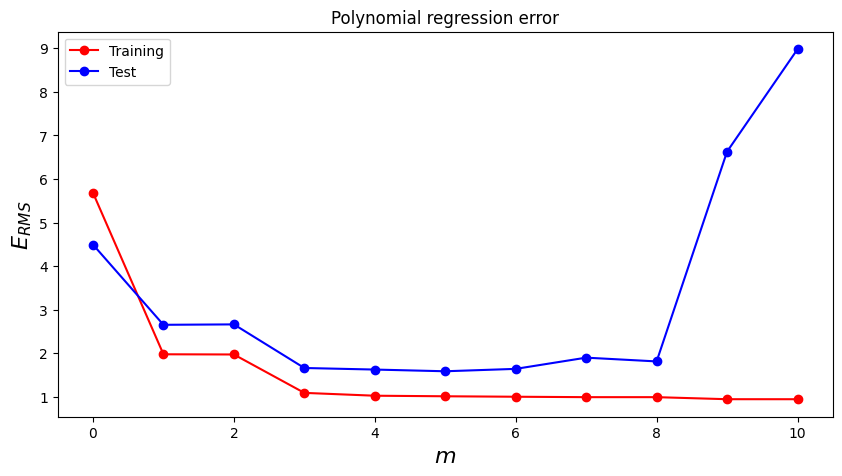

Done!


In [ ]:
######################################################################
# main
######################################################################

import matplotlib.pyplot as plt
import time

def main():
    # load data
    train_path = '/content/drive/My Drive/UCLA/Winter_2025/CM146_ML/pset2/regression_train.csv'
    test_path = '/content/drive/My Drive/UCLA/Winter_2025/CM146_ML/pset2/regression_test.csv'
    train_data = load_data(train_path)
    test_data = load_data(test_path)


    ### ========== TODO : START ========== ###
    # part a: main code for visualizations
    print('Visualizing data...')

    print("Train Data:")
    plot_data(train_data.X, train_data.y)

    print("Test Data:")
    plot_data(test_data.X, test_data.y)

    ### ========== TODO : END ========== ###



    ### ========== TODO : START ========== ###
    # parts b-f: main code for linear regression
    print('Investigating linear regression...')

    # part d-------------------------------------
    # model = PolynomialRegression()
    # model.coef_ = np.zeros(2)
    # print("Model cost with zero weight: ", model.cost(train_data.X, train_data.y))

    # # step_size_seq = [1e-4, 1e-3, 1e-2, 0.0407]
    # step_size_seq = [1e-6, 1e-5, 1e-3, 0.1]

    # for step_size in step_size_seq:

    #     model = model.fit_GD(train_data.X, train_data.y, step_size)

    model = PolynomialRegression()
    model.coef_ = np.zeros(2)
    a = model.cost(train_data.X, train_data.y)
    b = sum(a)
    print (b)


    print ("FITTING WITH GD")
    # etas = [0.0001, 0.001, 0.01, 0.0407]
    etas = [0.000001, 0.00001, 0.001, 0.1]
    li = []
    for eta in etas:
        # Call fit_GD and store the returned object (which is the model itself)
        start_time = time.time()  # Record start time before fitting
        model = model.fit_GD(X=train_data.X, y=train_data.y, eta=eta, verbose=False)
        end_time = time.time()  # Record end time after fitting
        time_taken = end_time - start_time  # Calculate time taken

        # Get the number of iterations (t + 1 from fit_GD)
        # Assuming t is accessible within fit_GD (you might need to store it as an attribute)
        # If not accessible, consider modifying fit_GD to return t + 1 as well
        num_iters = 0  # Replace with the actual value of t + 1

        # Append the results to the list
        li.append({'eta': eta, 'coefficient': model.coef_, 'num_iters': num_iters, 'cost': sum(model.cost(train_data.X, train_data.y)), 'time': time_taken})

    for item in li:
        print("eta: " + str(item['eta']) + " | " + "coefficient: " + str(item['coefficient']) + " | " + "cost: " + str(item['cost']) + " | " + 'num_iterations: ' + str(item['num_iters']) + " | " + 'time: ' + str(item['time']))


    #----------------------------------------------

    # # part e
    # model, time = model.fit(train_data.X, train_data.y)
    # print("Finding weight with close form solution...")
    # print("-- coefficient: %s" % model.coef_)
    # print("-- cost: ", model.cost(train_data.X, train_data.y))
    # print("-- process finish using %f sec" % time)



    ### ========== TODO : END ========== ###



    ### ========== TODO : START ========== ###
    # parts g-i: main code for polynomial regression
    train_rmse_values = []
    test_rmse_values = []

    for deg in range(11):

        model = PolynomialRegression(m=deg)
        model.fit(train_data.X, train_data.y)

        # RMSE for train and test
        train_rmse = model.rms_error(train_data.X, train_data.y)
        test_rmse = model.rms_error(test_data.X, test_data.y)

        train_rmse_values.append(train_rmse)
        test_rmse_values.append(test_rmse)

    plot_erms(range(11), train_rmse_values, test_rmse_values)

    ### ========== TODO : END ========== ###


    print("Done!")

if __name__ == "__main__":
    main()
